In [6]:
import pandas as pd
import forestplot as fp
print(fp.__version__)

0.2.2


## Table headers don't work as expected with 6 (or fewer) rows of data 
See issue [#48](https://github.com/LSYS/forestplot/issues/48)

In [2]:
df = fp.load_data("sleep")
df.head(3)

,n,r,CI95%,p-val,BF10,power,var,hl,ll,moerror,group,label
0,706,0.090373,[0.02 0.16],0.016309,0.839,0.67,age,0.16,0.02,0.069627,age,in years
1,706,0.048081,[-0.03 0.12],0.201948,0.106,0.25,clerical,0.12,-0.03,0.071919,occupation,=1 if clerical worker
2,706,0.041229,[-0.03 0.11],0.273948,0.086,0.19,construc,0.11,-0.03,0.068771,occupation,=1 if construction worker


In [3]:
std_opts = dict(
    estimate="r",
    ll="ll", hl="hl",
    varlabel="label",
    capitalize="capitalize",  
    pval="p-val",  # column containing p-values to be formatted
    annote=["n", "power", "est_ci"],  # columns to report on left of plot
    annoteheaders=["N", "Power", "Est. (95% Conf. Int.)"],  # ^corresponding headers
    rightannote=["formatted_pval", "group"],  # columns to report on right of plot 
    right_annoteheaders=["P-value", "Variable group"],  # ^corresponding headers
    xlabel="Pearson correlation coefficient",  # x-label title
    table=True
)

<AxesSubplot:>

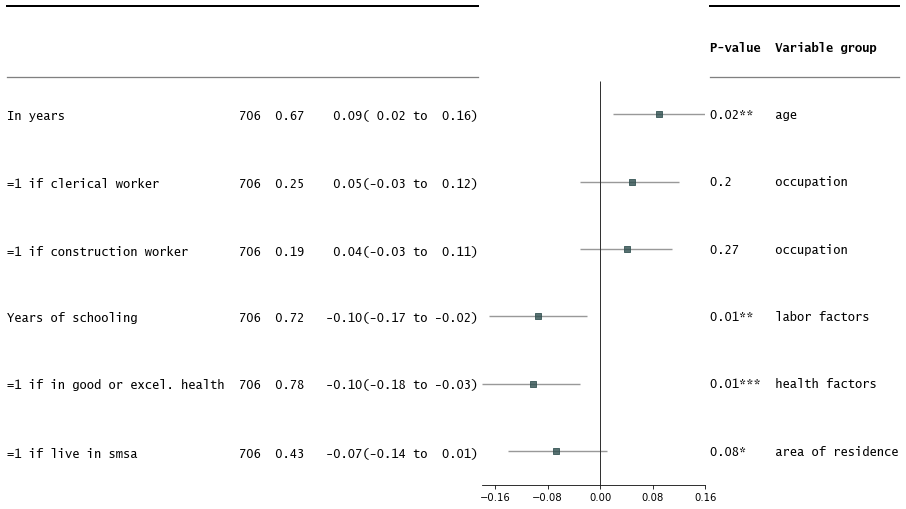

In [9]:
fp.forestplot(df.head(6),  # the dataframe with results data
              estimate="r",  # col containing estimated effect size 
              ll="ll", hl="hl",  # lower & higher limits of conf. int.
              varlabel="label",  # column containing the varlabels to be printed on far left
              capitalize="capitalize",  # Capitalize labels
              pval="p-val",  # column containing p-values to be formatted
              annote=["n", "power", "est_ci"],  # columns to report on left of plot
              annoteheaders=["N", "Power", "Est. (95% Conf. Int.)"],  # ^corresponding headers
              rightannote=["formatted_pval", "group"],  # columns to report on right of plot 
              right_annoteheaders=["P-value", "Variable group"],  # ^corresponding headers
              table=True,  # Format as a table
              )


<AxesSubplot:xlabel='Pearson correlation coefficient'>

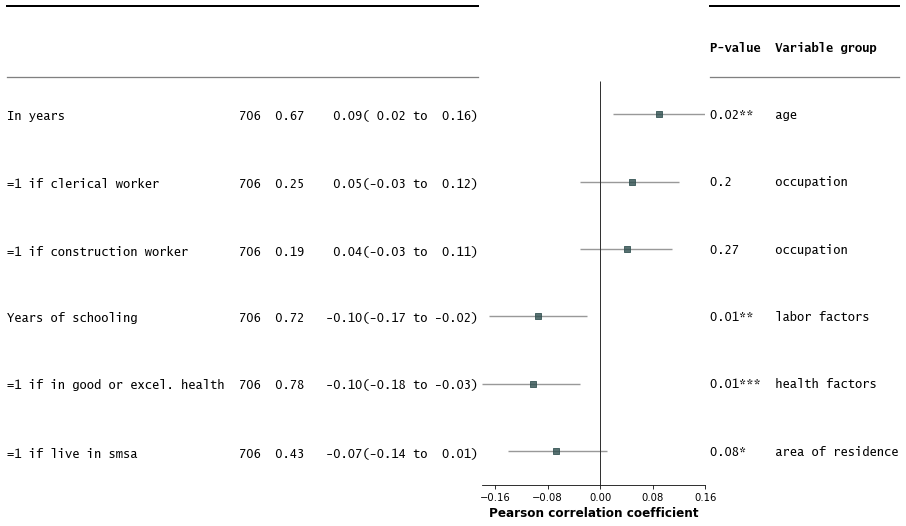

In [7]:
# 6 rows and below: Right annotation disappears
fp.forestplot(df.head(6), **std_opts)

<AxesSubplot:xlabel='Pearson correlation coefficient'>

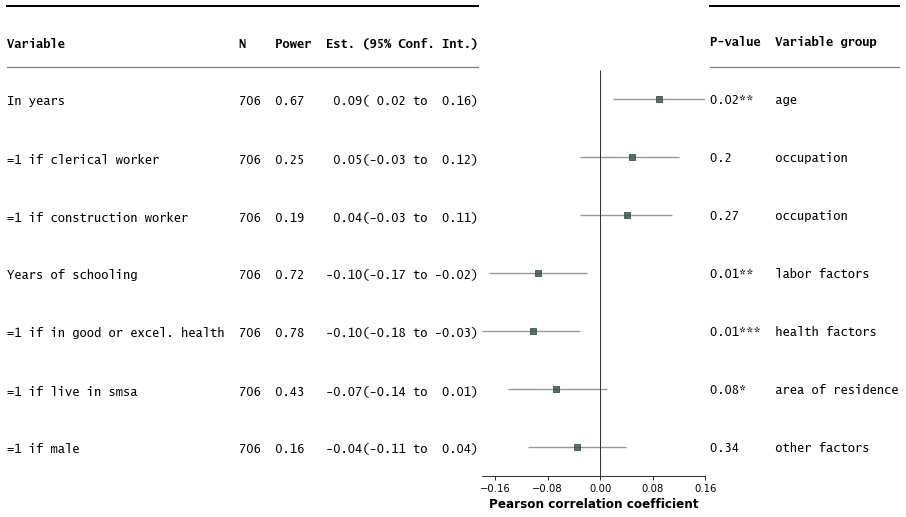

In [5]:
# 7 rows and above: Things work as expected
fp.forestplot(df.head(7), **std_opts)